# Prepare real data

In [3]:
STUDY_NAME = 'Subsea_Study[7]'

In [1]:
import numpy as np
import pandas as pd
import pyfas as fa
import json
import os

import matplotlib.pyplot as plt
import sys
sys.path.append('../')
from utils import *
import config

In [5]:
ROOT = config.ROOT
ROOT_SLASH = config.ROOT_SLASH
DATA_PATH = config.DATA_PATH

STUDY_PATH = f'{DATA_PATH}/{STUDY_NAME}'
GEN_DFS_PATH = f'{STUDY_PATH}/gens'
TPL_PATH = f'{ROOT_SLASH}\\olga_proj\\{STUDY_NAME}'

REAL_FILE = config.REAL_FILE
REAL_FILE_ALL = config.REAL_FILE_ALL

TRAIN_VAL_RATIO_REAL = config.TRAIN_VAL_RATIO_REAL
TRAIN_VAL_RATIO_GEN = config.TRAIN_VAL_RATIO_GEN
N_STEPS = config.N_STEPS
N_FEATURES_IN = config.N_FEATURES_IN
N_FEATURES_OUT = config.N_FEATURES_OUT

pd.options.display.max_columns = 25

STUDY_PATH, GEN_DFS_PATH, REAL_FILE, TPL_PATH, TRAIN_VAL_RATIO_REAL, TRAIN_VAL_RATIO_GEN

VOLVE_FILE = config.VOLVE_FILE
REAL_FILE = config.REAL_FILE

In [6]:
pd.options.display.max_columns = 25

## Read the data

In [7]:
df = pd.read_excel(VOLVE_FILE, sep=';')
df = df.drop(columns=['WELL_BORE_CODE', 'NPD_WELL_BORE_NAME', 'NPD_FIELD_CODE', 'NPD_FIELD_NAME', 'NPD_FACILITY_CODE', 'NPD_FACILITY_NAME', 'AVG_CHOKE_UOM'])

# df[['AVG_WHP_P']] /= 14.504 # psi to bar

In [8]:
well_num = 7405
well = df[df['NPD_WELL_BORE_CODE'] == well_num]
well = well.drop(columns=['ON_STREAM_HRS', 'AVG_DP_TUBING', 'NPD_WELL_BORE_CODE', 'FLOW_KIND', 'BORE_WI_VOL', 'AVG_ANNULUS_PRESS', 'WELL_TYPE'])

well = well.drop(well.shape[0] - 1)
well = well.drop(0)

well = well.fillna(0)
well = well.set_index('DATEPRD')

C:\Users\Asus\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


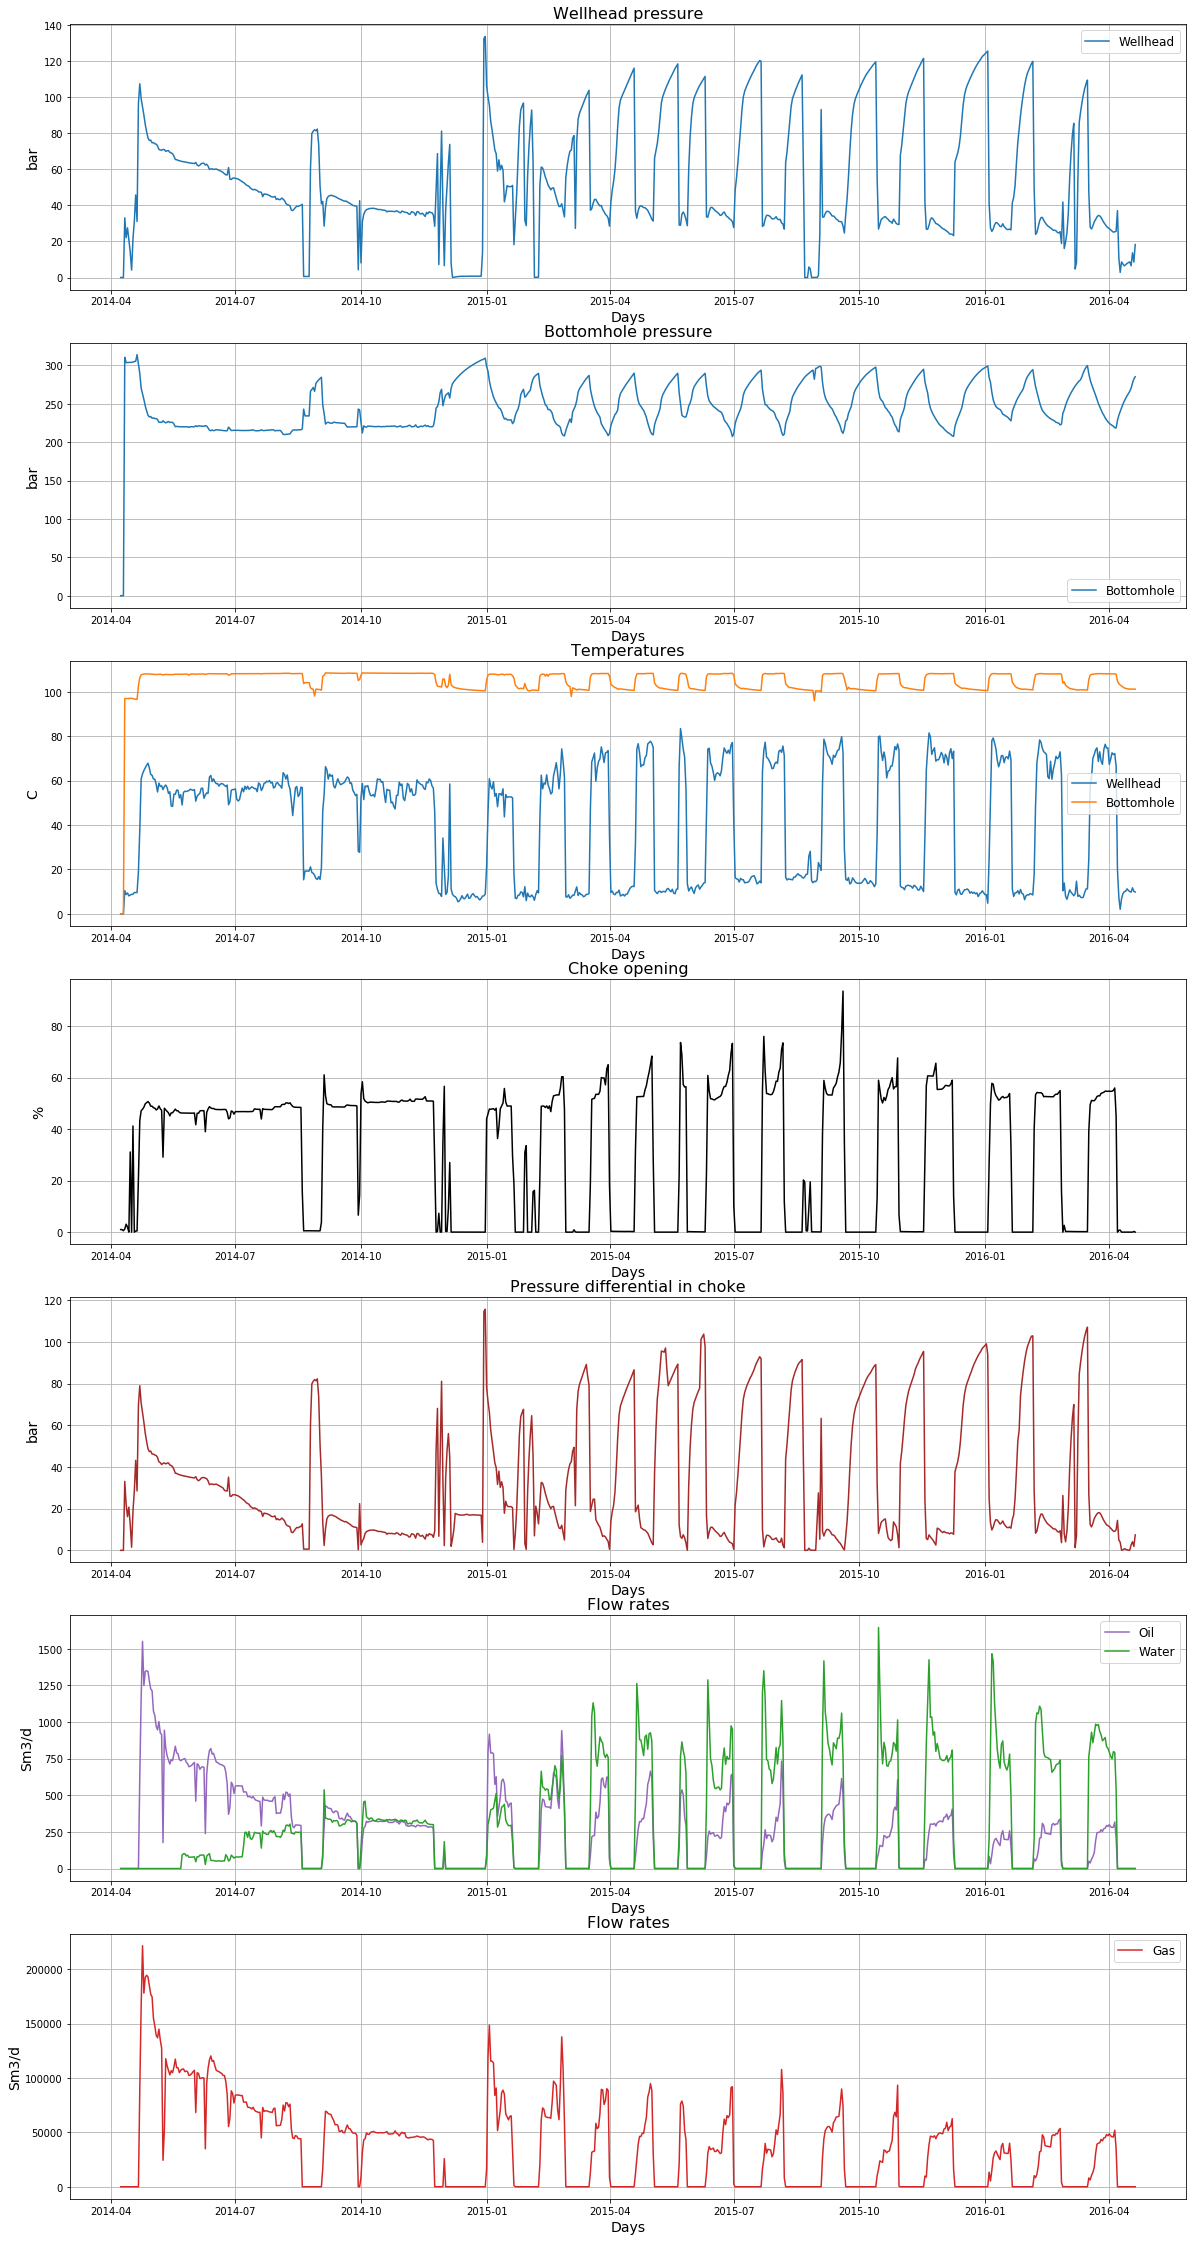

In [9]:
plot_color(well)

In [8]:
# tmp = well['AVG_CHOKE_SIZE_P'][well.shape[0]//3:]
# plt.figure(figsize=(18, 5))
# plt.plot(tmp, '.-')
# plt.grid(True)

In [9]:
# plt.figure(figsize=(18, 5))
# plt.plot(tmp[125:214], '.-')
# plt.grid(True)

In [10]:
# tmp[125:170]

In [11]:
# tmp[170:214]

In [14]:
def plot_color(df):
    with open('../units.json') as infile:
        units = json.load(infile)
    
    fontsize = 16
    fontsize1 = 14
    prop = {'size': 12}
    plt.figure(figsize=(20, 40))

    plt.subplot(711)
    plt.plot(df["AVG_WHP_P"], '.-', label="Wellhead")
    plt.title("Wellhead pressure", fontsize=fontsize)
    plt.xlabel("Days", fontsize=fontsize1)
    plt.ylabel(units['AVG_WHP_P'], fontsize=fontsize1)
    # plt.axvline(inputs.index[train_len], color="black", ls="--", lw=1.5)
    plt.grid(True)
    plt.legend(prop=prop)

    plt.subplot(712)
    plt.plot(df["AVG_DOWNHOLE_PRESSURE"], '.-', label="Bottomhole")
    plt.title("Bottomhole pressure", fontsize=fontsize)
    plt.xlabel("Days", fontsize=fontsize1)
    plt.ylabel(units['AVG_WHP_P'], fontsize=fontsize1)
    # plt.axvline(inputs.index[train_len], color="black", ls="--", lw=1.5)
    plt.grid(True)
    plt.legend(prop=prop)

    plt.subplot(713)
    plt.plot(df["AVG_WHT_P"], '.-', label="Wellhead")
    plt.plot(df["AVG_DOWNHOLE_TEMPERATURE"], '.-', label="Bottomhole")
    plt.title("Temperatures", fontsize=fontsize)
    plt.xlabel("Days", fontsize=fontsize1)
    plt.ylabel(units["AVG_WHT_P"], fontsize=fontsize1)
    # plt.axvline(inputs.index[train_len], color="black", ls="--", lw=1.5)
    plt.grid(True)
    plt.legend(prop=prop)

    plt.subplot(714)
    plt.plot(df["AVG_CHOKE_SIZE_P"], '.-', color="black")
    plt.title("Choke opening", fontsize=fontsize)
    plt.xlabel("Days", fontsize=fontsize1)
    plt.ylabel(units['AVG_CHOKE_SIZE_P'], fontsize=fontsize1)
    # plt.axvline(inputs.index[train_len], color="black", ls="--", lw=1.5)
    plt.grid(True)

    plt.subplot(715)
    plt.plot(df["DP_CHOKE_SIZE"], '.-', color="brown")
    plt.title("Pressure differential in choke", fontsize=fontsize)
    plt.xlabel("Days", fontsize=fontsize1)
    plt.ylabel(units['DP_CHOKE_SIZE'], fontsize=fontsize1)
    # plt.axvline(inputs.index[train_len], color="black", ls="--", lw=1.5)
    plt.grid(True)

    plt.subplot(716)
    plt.plot(df["BORE_OIL_VOL"], '.-', color="tab:purple", label="Oil")
    plt.plot(df["BORE_WAT_VOL"], '.-', color="tab:green", label="Water")
    plt.title("Flow rates", fontsize=fontsize)
    plt.xlabel("Days", fontsize=fontsize1)
    plt.ylabel(units["BORE_OIL_VOL"], fontsize=fontsize1)
    # plt.axvline(inputs.index[train_len], color="black", ls="--", lw=1.5)
    plt.grid(True)
    plt.legend(prop=prop)

    plt.subplot(717)
    plt.plot(df["BORE_GAS_VOL"], '.-', color="tab:red", label="Gas")
    plt.title("Flow rates", fontsize=16)
    plt.xlabel("Days", fontsize=fontsize1)
    plt.ylabel(units["BORE_OIL_VOL"], fontsize=fontsize1)
    # plt.axvline(inputs.index[train_len], color="black", ls="--", lw=1.5)
    plt.grid(True)
    plt.legend(prop=prop)

    plt.show();

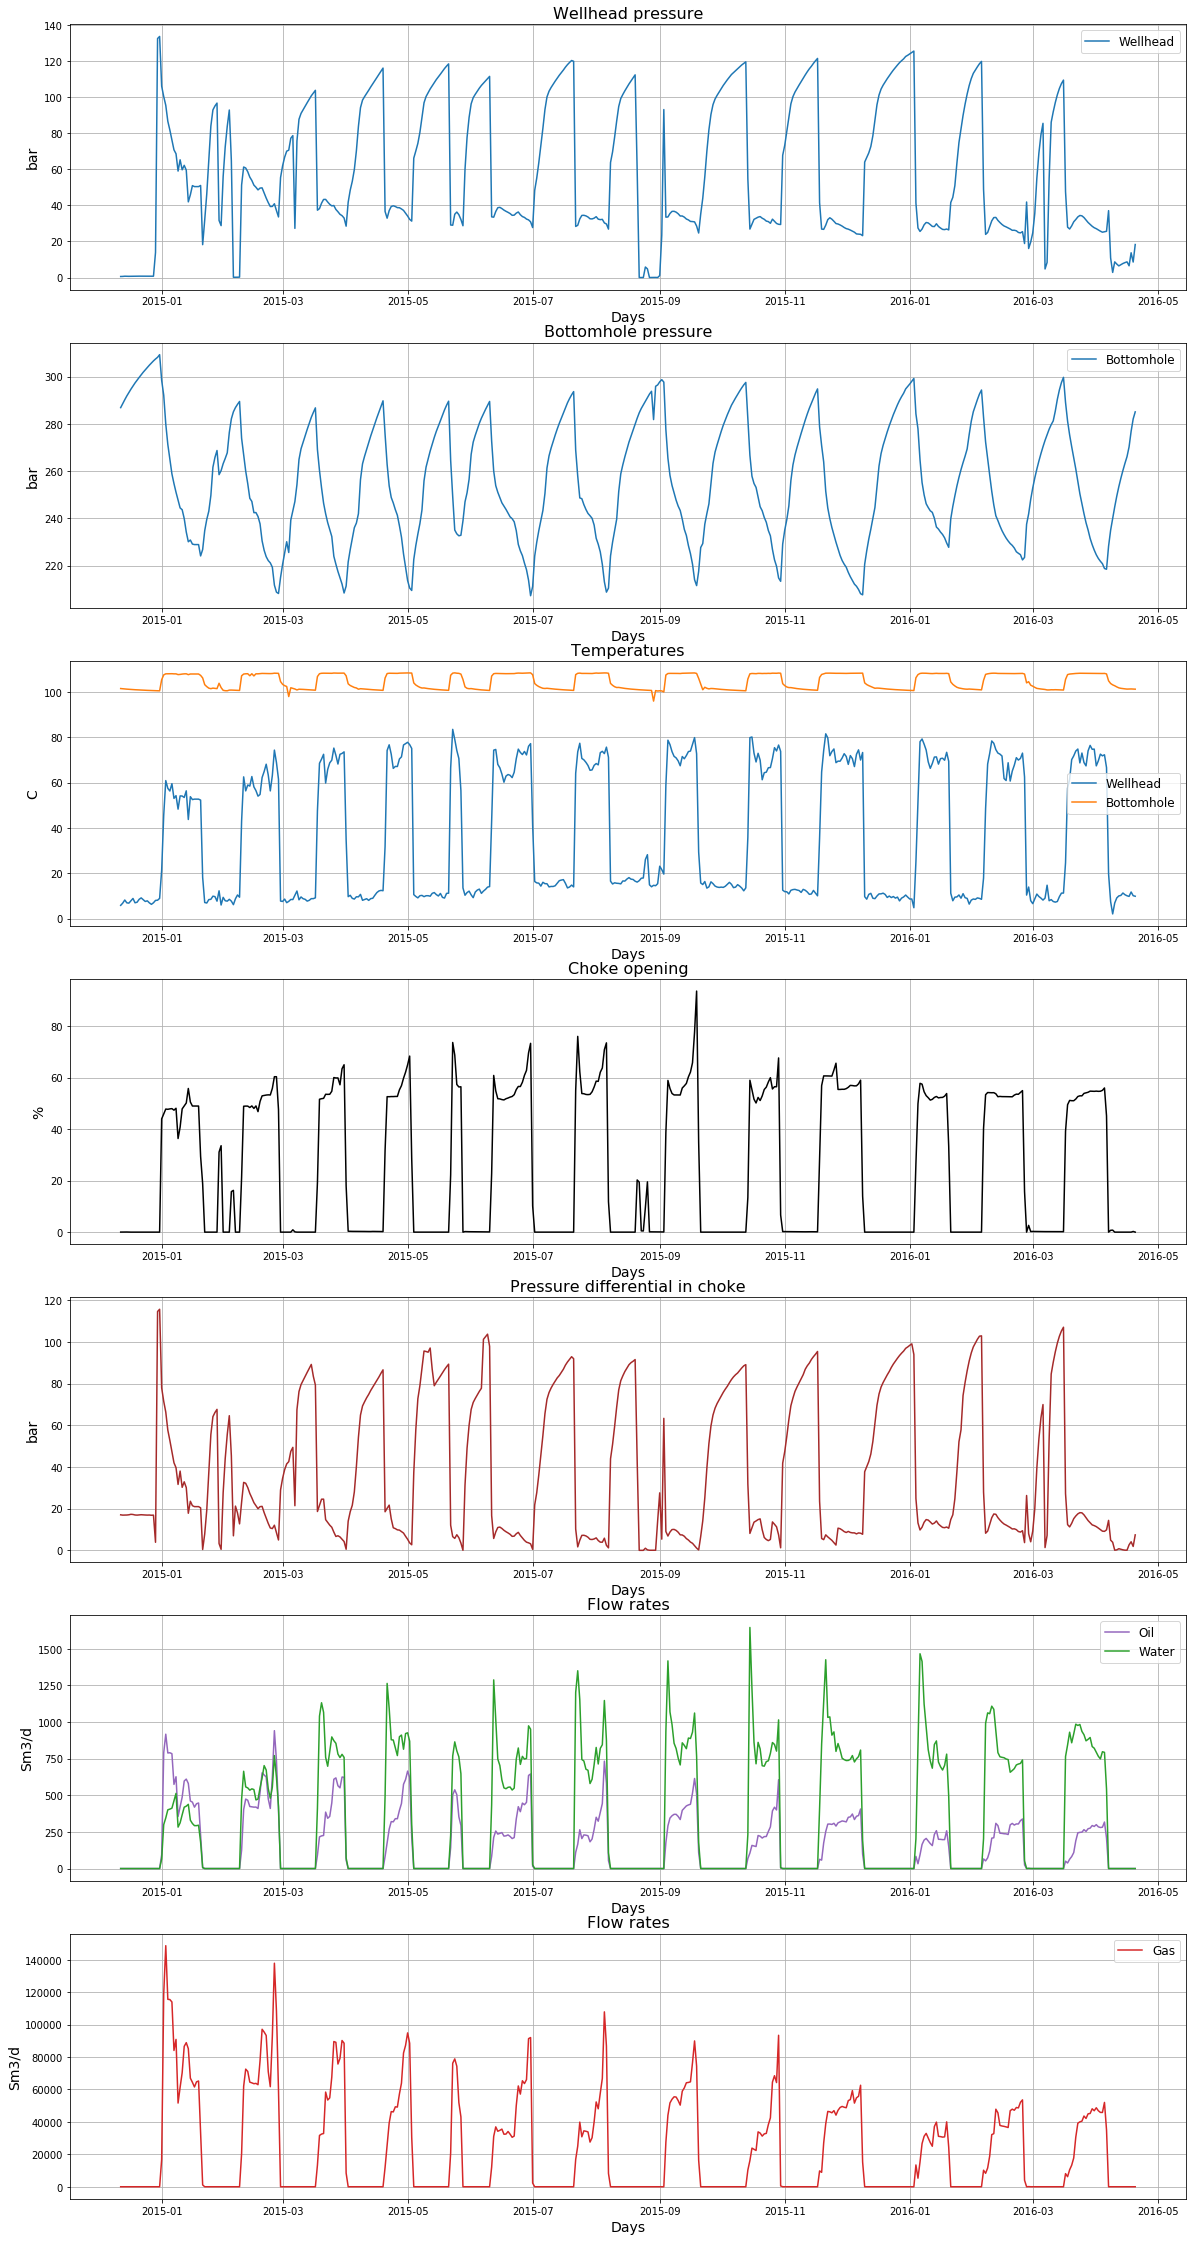

In [10]:
well_new = well[well.shape[0]//3:]
plot_color(well_new)

In [15]:
well_new.shape[0] / 3, well_new.shape[0]

(165.33333333333334, 496)

In [16]:
print ([i for i in range(165)])

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164]


### Plot reservoir characteristics

In [16]:
watercut = well['BORE_WAT_VOL'] / (well['BORE_WAT_VOL'] + well['BORE_OIL_VOL'])
GOR = well['BORE_GAS_VOL'] / well['BORE_OIL_VOL']
Q_l = well['BORE_OIL_VOL'] + well['BORE_WAT_VOL']
Q = well['BORE_OIL_VOL'] + well['BORE_WAT_VOL'] + well['BORE_GAS_VOL']
PI = Q_l / (340 - well['AVG_DOWNHOLE_PRESSURE'])

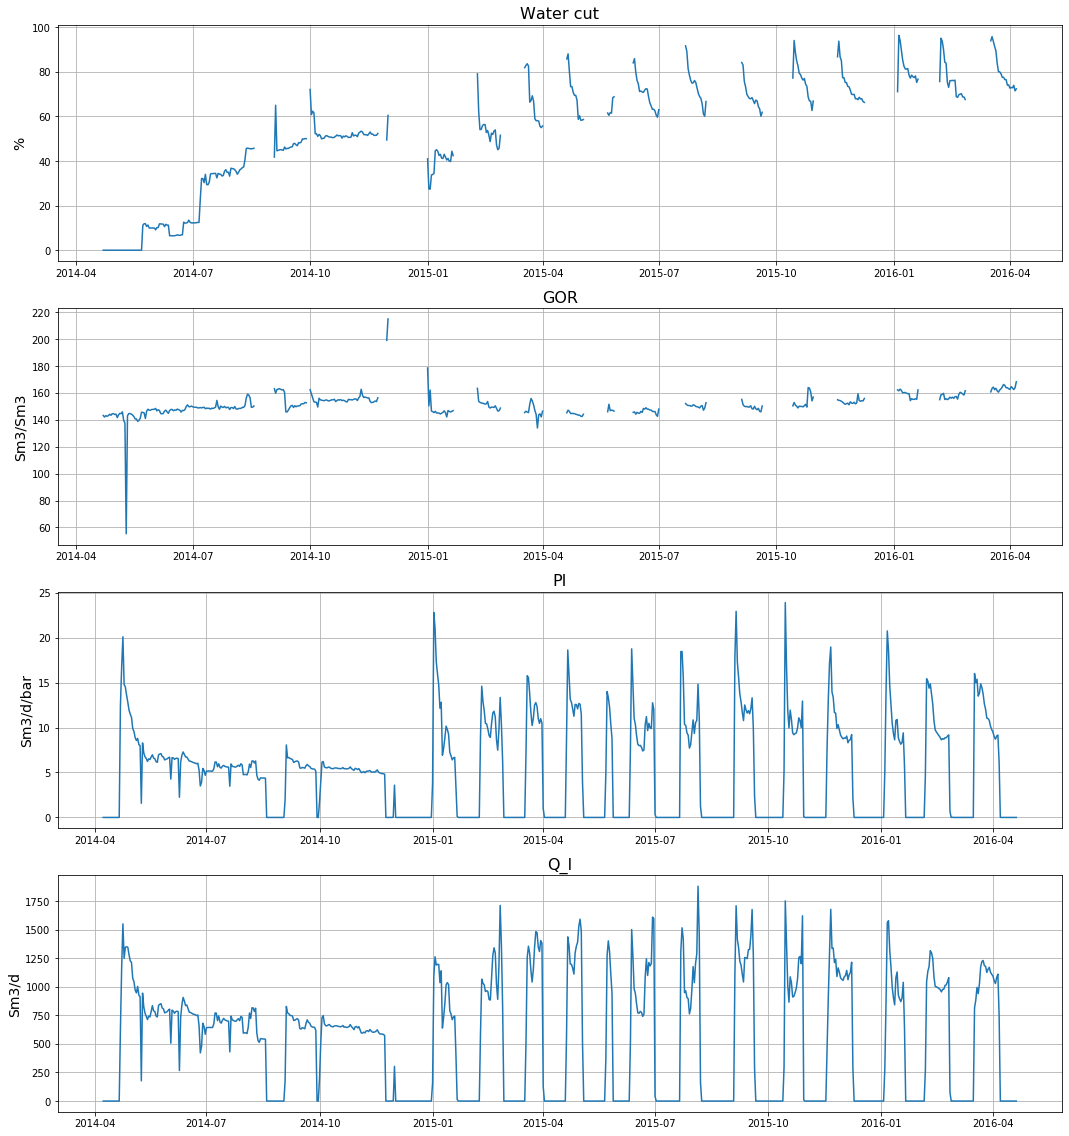

In [17]:
plot_estimations(watercut, GOR, PI, Q_l)

In [18]:
# plt.figure(figsize=(18, 4))
# plt.plot(well['BORE_OIL_VOL'] / (330 - well['AVG_DOWNHOLE_PRESSURE']))
# plt.grid(True)
# plt.title("Q oil");

In [19]:
# plt.figure(figsize=(18, 4))
# plt.plot(Q_l / (330 - well['AVG_DOWNHOLE_PRESSURE']))
# plt.grid(True)
# plt.title("Q liq");

In [20]:
# (well.set_index('DATEPRD') < 0).sum()

In [21]:
def generate_choke(t_lim):
    mean_ts_global = 19
    std_ts = 4

    max_div = 3

    mean_pick = 55
    std_pick = 2

    mean_slow = mean_pick // 2
    std_slow = 30

    opened = np.random.randint(2)
    steps = []

    while len(steps) < t_lim:
        mean_ts = mean_ts_global
        if len(steps) == 0:
            mean_ts = mean_ts // (np.random.randint(max_div) + 1)     # first sequence
        ts = mean_ts + np.random.randint(std_ts * 2 + 1) - std_ts     # 19 +- 4

        if opened == False:
            steps.extend([0] * ts)
            opened = True
        else:
            picks = [mean_pick + np.random.randint(std_pick) + 1 for _ in range(ts)]
            steps.extend(picks)
            opened = False

#         slow = np.random.randint(2)
#         if slow == 1:
        steps.append(mean_slow + np.random.randint(std_slow * 2 + 1) - std_slow)
    
    return steps[:t_lim]

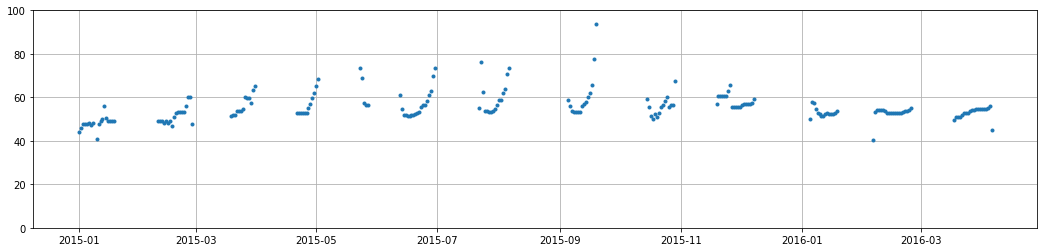

In [26]:
ch = well_new.AVG_CHOKE_SIZE_P
ch_op = ch[ch > 40]

plt.figure(figsize=(18, 4))
plt.ylim(0, 100)
plt.grid(True)
plt.plot(ch_op, '.');

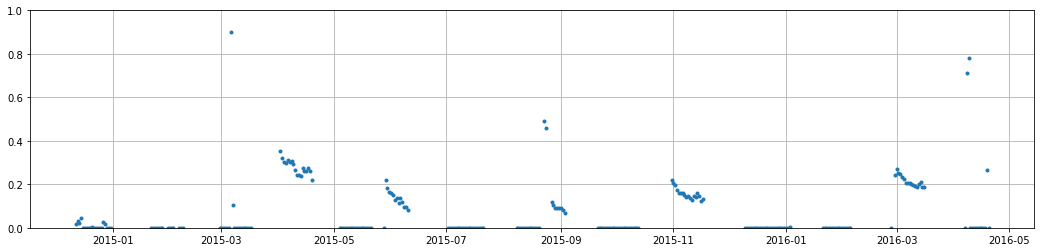

In [88]:
ch = well_new.AVG_CHOKE_SIZE_P
ch_op = ch[ch < 1]

plt.figure(figsize=(18, 4))
plt.ylim(0, 1)
plt.grid(True)
plt.plot(ch_op, '.');

In [62]:
ops = []
opened = False
deleted = False

for c in ch:
    if c > 5:
        if not opened:
            opened = True
            deleted = False
            ops.append([])
        else:
            ops[-1].append(c)
    else:
        if not deleted and len(ops) != 0:
            if len(ops[-1]) > 0:
                ops[-1] = ops[-1][:-1]
            deleted = True
        opened = False

In [70]:
ops = [x for x in ops if x != []]
ops[0] = ops[0][:-1]

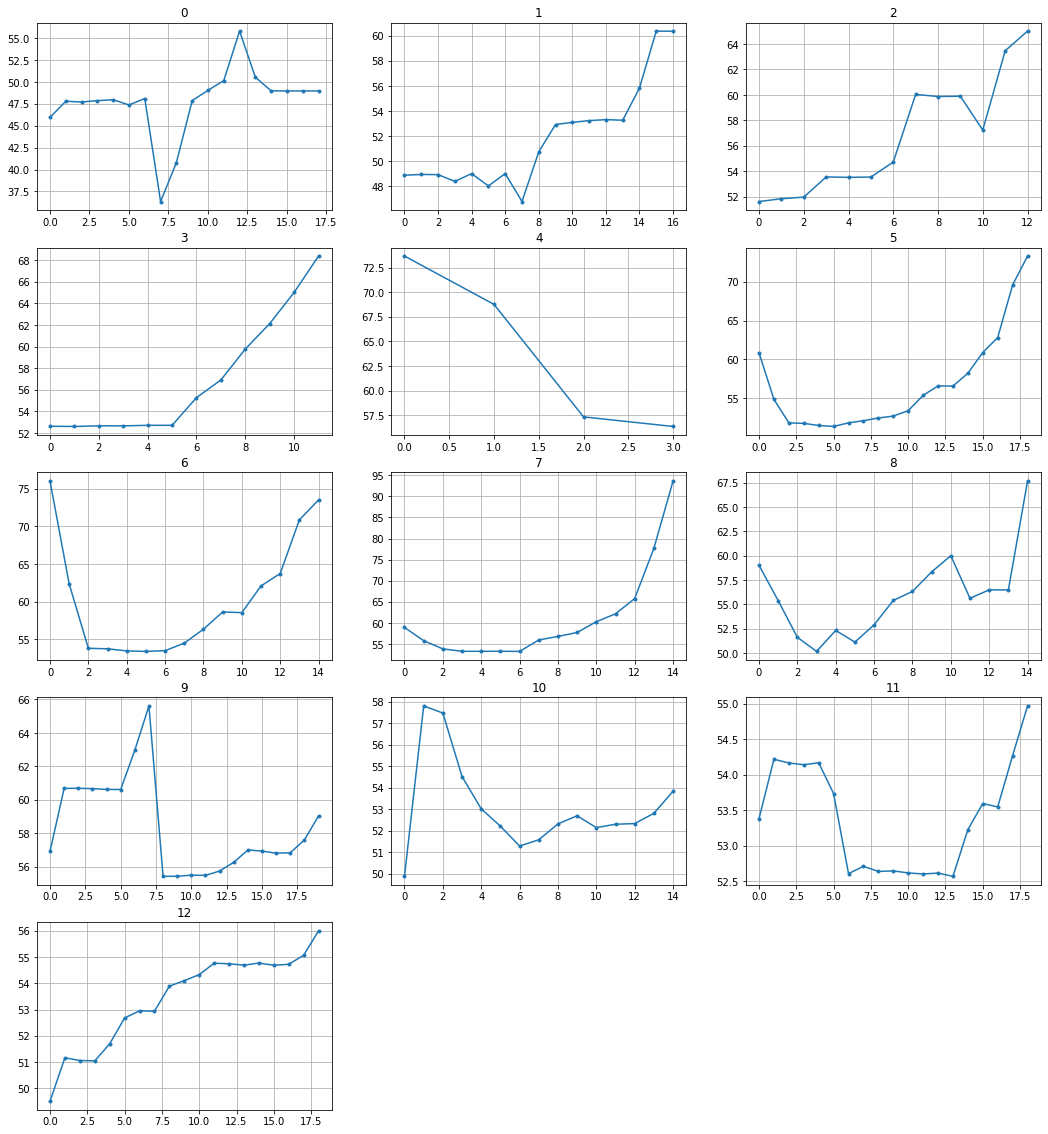

In [79]:
plt.figure(figsize=(18, 20))

for i, op in enumerate(ops):
    plt.subplot(len(ops) // 3 + 1, 3, i+1)
    plt.plot(op, '.-')
    plt.title(i)
    plt.grid(True)

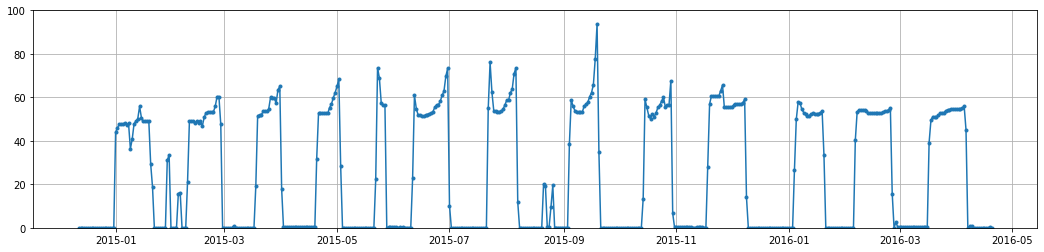

In [22]:
plt.figure(figsize=(18, 4))
plt.ylim(0, 100)
plt.grid(True)
plt.plot(well_new.AVG_CHOKE_SIZE_P, '.-');

In [25]:
pd.options.display.max_rows = 1000

In [26]:
tmp = well_new.AVG_CHOKE_SIZE_P
mask = tmp > 40
# plt.figure(figsize=(18, 4))
# plt.ylim(0, 100)
# plt.grid(True)
# plt.plot(tmp[mask], '.-')
tmp[mask]

DATEPRD
2015-01-01    44.000000
2015-01-02    45.952117
2015-01-03    47.798947
2015-01-04    47.710102
2015-01-05    47.867310
2015-01-06    47.972498
2015-01-07    47.375647
2015-01-08    48.111449
2015-01-10    40.788846
2015-01-11    47.868513
2015-01-12    49.043021
2015-01-13    50.155711
2015-01-14    55.801912
2015-01-15    50.539541
2015-01-16    48.985482
2015-01-17    48.974460
2015-01-18    48.974460
2015-01-19    48.974460
2015-02-10    48.896484
2015-02-11    48.959310
2015-02-12    48.945121
2015-02-13    48.407934
2015-02-14    49.024829
2015-02-15    48.045273
2015-02-16    49.028180
2015-02-17    46.803729
2015-02-18    50.763973
2015-02-19    52.934719
2015-02-20    53.106882
2015-02-21    53.242342
2015-02-22    53.324686
2015-02-23    53.273245
2015-02-24    55.836189
2015-02-25    60.367971
2015-02-26    60.360615
2015-02-27    47.620349
2015-03-19    51.612997
2015-03-20    51.832477
2015-03-21    51.958421
2015-03-22    53.545301
2015-03-23    53.516415
2015-03-

In [27]:
well_new.groupby(well_new.AVG_CHOKE_SIZE_P > 0).sum()

,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL
AVG_CHOKE_SIZE_P,,,,,,,,,
False,44109.662813,16732.185861,0.000000,13820.540124,1868.067835,10455.842886,0.00,0.0,0.00
True,82722.358933,35030.964962,12100.593756,14797.237188,16217.469411,8069.873173,74523.93,11216324.7,167576.56


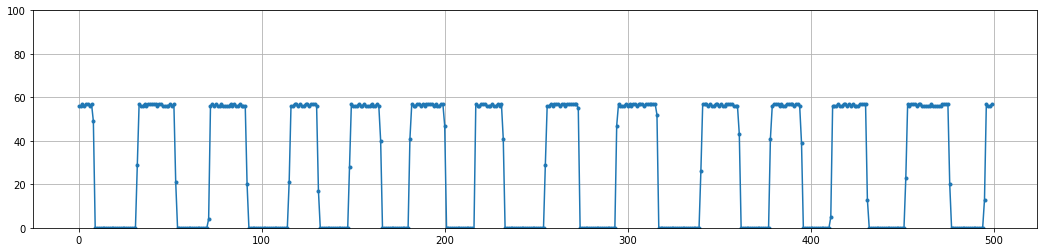

In [28]:
chokes = []
n_datasets = 1
n_points = 500

for _ in range(n_datasets):
    chokes.extend(generate_choke(n_points))

plt.figure(figsize=(18, 4))
plt.plot(chokes, '.-');
plt.ylim(0, 100)
plt.grid(True)

### Save the resulting dataset

In [17]:
if not os.path.exists(STUDY_PATH):
    os.makedirs(STUDY_PATH)

well_new.to_csv(REAL_FILE, index=False)

In [54]:
len(well_new) / 3, len(well_new)

(165.33333333333334, 496)

In [97]:
(len(well_new) - len(well_new) / 3) /100

3.306666666666666

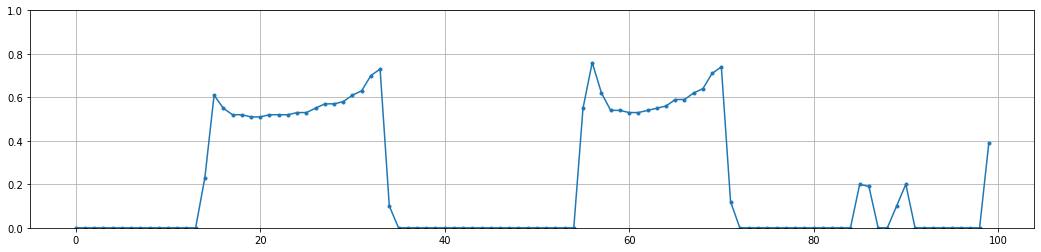

In [125]:
tmp = list(well_new['AVG_CHOKE_SIZE_P'].iloc[167:167+100].values)
temp1 = [np.round(t / 100, 2) for t in tmp]

plt.figure(figsize=(18, 4))
plt.plot(temp1, '.-');
plt.ylim(0, 1)
plt.grid(True)

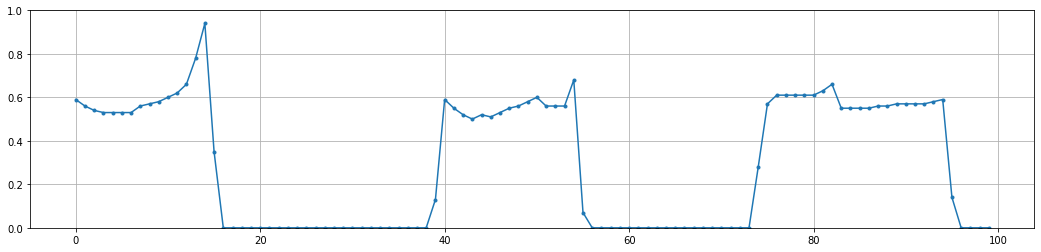

In [126]:
tmp = list(well_new['AVG_CHOKE_SIZE_P'].iloc[167+100:167+100*2].values)
temp2 = [np.round(t / 100, 2) for t in tmp]

plt.figure(figsize=(18, 4))
plt.plot(temp2, '.-');
plt.ylim(0, 1)
plt.grid(True)

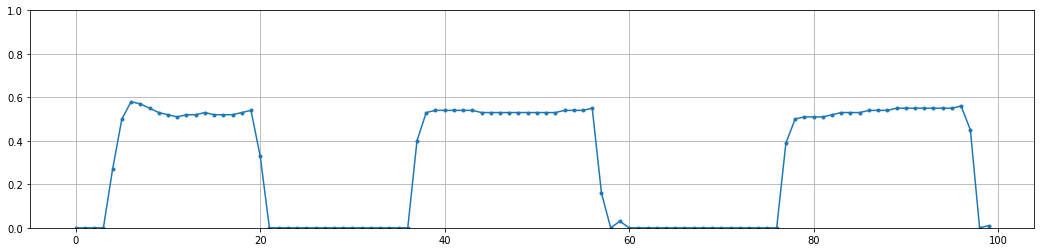

In [127]:
tmp = list(well_new['AVG_CHOKE_SIZE_P'].iloc[167+100*2+17:167+100*3+17].values)
temp3 = [np.round(t / 100, 2) for t in tmp]

plt.figure(figsize=(18, 4))
plt.plot(temp3, '.-');
plt.ylim(0, 1)
plt.grid(True)

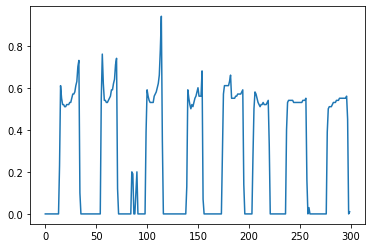

In [128]:
temp = temp1
temp.extend(temp2)
temp.extend(temp3)
plt.plot(temp);

In [131]:
print (temp)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.23, 0.61, 0.55, 0.52, 0.52, 0.51, 0.51, 0.52, 0.52, 0.52, 0.53, 0.53, 0.55, 0.57, 0.57, 0.58, 0.61, 0.63, 0.7, 0.73, 0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.55, 0.76, 0.62, 0.54, 0.54, 0.53, 0.53, 0.54, 0.55, 0.56, 0.59, 0.59, 0.62, 0.64, 0.71, 0.74, 0.12, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.19, 0.0, 0.0, 0.1, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.39, 0.59, 0.56, 0.54, 0.53, 0.53, 0.53, 0.53, 0.56, 0.57, 0.58, 0.6, 0.62, 0.66, 0.78, 0.94, 0.35, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.13, 0.59, 0.55, 0.52, 0.5, 0.52, 0.51, 0.53, 0.55, 0.56, 0.58, 0.6, 0.56, 0.56, 0.56, 0.68, 0.07, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.28, 0.57, 0.61, 0.61, 0.61, 0.61, 0.61, 0.63, 0.66, 0.55, 0